<a href="https://colab.research.google.com/github/4zmyyy/Belajar-Python-/blob/main/Python_Learning_Day_4_6_Sankey_Flow_%26_Heatmap_attention_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import plotly.graph_objects as go

# Percobaan untuk membuat posisi encoding
def get_positional_encoding(max_seq_len, d_model):
    pos = np.arange(max_seq_len)[:, np.newaxis]
    dim = np.arange(d_model)[np.newaxis, :]
    angle = pos / np.power(10000, (2 * (dim // 2)) / d_model)
    angle[:, 0::2] = np.sin(angle[:, 0::2])
    angle[:, 1::2] = np.cos(angle[:, 1::2])
    return angle

# Implementasi Self-Attention dan cara kerjanya
class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, d_model):
        super(SelfAttention, self).__init__()
        self.d_model = d_model
        self.query = tf.keras.layers.Dense(d_model)
        self.key = tf.keras.layers.Dense(d_model)
        self.value = tf.keras.layers.Dense(d_model)

    def call(self, x):
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)
        attention_scores = tf.matmul(Q, K, transpose_b=True) / tf.sqrt(tf.cast(self.d_model, tf.float32))
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)
        return tf.matmul(attention_weights, V), attention_weights

# Contoh penggunaan dan aplikasinya
max_seq_len = 5
d_model = 64
positional_encoding = get_positional_encoding(max_seq_len, d_model)
x = tf.constant(positional_encoding, dtype=tf.float32)

# Membuat layer self-attention
attention_layer = SelfAttention(d_model)
output, attention_weights = attention_layer(x)

# Visualisasi dengan model Sankey Diagram
fig = go.Figure()
source = []
target = []
value = []

for i in range(max_seq_len):
    for j in range(max_seq_len):
        source.append(i)
        target.append(j)
        value.append(attention_weights[i, j].numpy())

fig.add_trace(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[f"Token {i}" for i in range(max_seq_len)]
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))

fig.update_layout(title_text="Sankey Diagram of Attention Weights", font_size=12)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

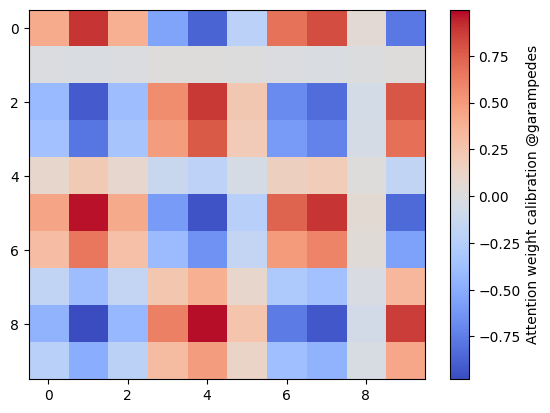

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from google.colab import files

# percobaan inisialisasi data
fig, ax = plt.subplots()
x = np.linspace(0, 10, 10)  # 10 kolom
y = np.linspace(0, 10, 10)  # 10 baris
X, Y = np.meshgrid(x, y)

# percobaan 2 fungsi untuk pola data yang akan ditampilkan
def generate_data(frame):
    return np.sin(X + frame * 0.1) * np.cos(Y + frame * 0.1)

# Generate data untuk heatmap
data = generate_data(0)
cax = ax.imshow(data, cmap='coolwarm', aspect='auto', animated=True)
cbar = fig.colorbar(cax, ax=ax)  # Menambahkan colorbar
cbar.set_label('Attention weight calibration')

# Fungsi data untuk array
def update(frame):
    new_data = generate_data(frame)
    cax.set_array(new_data)
    return cax,

# pengecekan animasi secara gradual
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# percobaan untuk save animasi dengan format gif
ani.save('heatmap_animation.gif', writer='pillow', fps=20)

# save file gif
files.download('heatmap_animation.gif')